In [1]:
%run "Retropy_framework.ipynb"

Installing requirements ..
Done


In [2]:
mdf = pd.read_csv("Research/GemelNet.csv")
mdf["month"] = pd.to_datetime(mdf["month"], format="%Y/%m/%d")
mdf["month_return"] = pd.to_numeric(mdf["month_return"].astype(str).str.replace("%", ""), errors="coerce")
mdf["net_flow"] = series_as_float(mdf["net_flow"])
mdf["AUM"] = series_as_float(mdf["AUM"])



/home/user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [16]:
#mdf = mdf.set_index("month")

def getValue(df):
    df = df.set_index("month")
    ser = df["month_return"].dropna().copy()
    if len(ser) == 0:
        return pd.Series()
    prevMonth = ser.index[0] + pd.DateOffset(months=-1)
    ser[prevMonth] = 0 # we want the serie sto start at 1.0
    ser = ser.sort_index()
    ser.index = ser.index + pd.DateOffset(months=1)
    return (1+ser.dropna()/100).cumprod()

#sym = mdf[mdf["ID"] == 1544]
#ym["month_return"]
#getValue(sym).plot()

def getKeren(id):
    df = mdf[mdf["ID"] == id]
    name = str(id) + " | " + df.iloc[0]["name"]
    s = getValue(df)
    usdils = getForex("USD", "ILS")
    s = (s/usdils).dropna()
    if len(s) > 0:
        s = s / s[0]
    return wrap(s, name)
    
def getAum(id):
    df = mdf[mdf["ID"] == id]
    name = str(id) + " | " + df.iloc[0]["name"]
    usdils = getForex("USD", "ILS")
    #aum = pd.to_numeric(df["AUM"].str.replace(",", "").replace("- - -", ""))
    #aum = pd.to_numeric(df["AUM"], errors="coerce")
    aum = series_as_float(df["AUM"])
    aum.index = df["month"]
    aum = aum/usdils
    aum = wrap(aum.dropna(), name + " AUM")
    return aum

def getFlow(id):
    df = mdf[mdf["ID"] == id]
    name = str(id) + " | " + df.iloc[0]["name"]
    usdils = getForex("USD", "ILS")
    #flow = pd.to_numeric(df["net_flow"].str.replace(",", "").replace("- - -", ""))
    flow = series_as_float(df["net_flow"])
    flow.index = df["month"]
    flow = flow/usdils
    flow = wrap(flow.dropna(), name + " flow")
    return flow

def getFlowSum(id):
    return getFlow(id).cumsum()


### השוואה של קרן השתלמות מחקה ממדי חול איי-בי-איי למדדי חול

In [17]:
s = getKeren(1544)
bench = get("URTH")
bench = wrap(get("SPY:50|VGK:30|EEM:13|EWJ:7", mode="NTR"), "ntr")
benchTR = get("SPY:50|VGK:30|EEM:13|EWJ:7", mode="TR")
vt = get("VT", mode="NTR")
show(s / bench, s, bench, vt, trim=True)

### השוואה של קרן השתלמות מחקה סנופי איי-בי-איי לסנופי

In [18]:
s = getKeren(2265)
bench = get("SPXNTR@IC")
spy = get("SPY", mode="NTR")
x = (s / bench).dropna()
show(x, s, bench, spy, trim=True)

In [19]:
s = getKeren(9451)
bench = get("SPXNTR@IC")
spy = get("SPY", mode="NTR")
x = (s / bench).dropna()
show(x, s, bench, spy, trim=True)

In [20]:
intergemel = getKeren(9451)
ibi = getKeren(2265)
show(ibi / intergemel, ibi, intergemel, 1)


### כל קרנות ההשתלמות מגמל.נט

In [21]:
allKranotIDs = set(mdf.loc[mdf["type"]=="קרן השתלמות", "ID"].values)
allKranot = []
for id in allKranotIDs:
    keren = getKeren(id)
    allKranot.append(keren)
    print(keren.name)
allKranot = [s for s in allKranot if len(s.s) > 0]

2048 |  *** מגדל השתלמות  הלכה
1537 | אינפיניטי השתלמות מניות בחו"ל
8704 | "אינטרגמל השתלמות"-מדד "תל בונד 20"
8705 | "אינטרגמל השתלמות"-מסלול מזומנים ושווי מזומנים
1542 | אקסלנס השתלמות בניהול אישי
2055 |  *** מיטב דש השתלמות חו"ל
1544 |  *** אי.בי.אי השתלמות פאסיבי - מדדי מניות חו"ל
1034 |  *** הראל השתלמות מסלול חו"ל
2058 | הלמן-אלדובי השתלמות שריעה
1038 | ילין לפידות קרן השתלמות מסלול אג"ח עד 25% מניות
7703 | אנליסט השתלמות כללי פאסיבי
2041 | ** מורים תיכוניים - מסלול הלכה
1059 |  *** פסגות שיא השתלמות פאסיבי-כללי
554 |  *** מיטב דש השתלמות עד 6 שנות וותק
2091 |  *** אקסלנס השתלמות אג"ח עד 20% מניות
558 |  *** אלטשולר שחם השתלמות אג"ח עד 15% במניות
2100 | אי.בי.אי השתלמות בניהול אישי
566 |  *** הראל השתלמות לטווח ארוך
(מסלול לאוכלוסיית יעד) 
8761 | הראל השתלמות IRA IRA
1083 | אינפיניטי השתלמות כללי
1084 | אינפיניטי השתלמות אג"ח
1085 | אינפיניטי השתלמות מניות בישראל
2114 | אינפיניטי השתלמות IRA בניהול אישי
579 |  *** מגדל השתלמות כללי
580 | ** שיבולת - השתלמות
1093 |  *** אלטשולר שח

481 | מיטב דש השתלמות  כללי פאסיבי
482 | ** מורים על יסודי
2018 |  *** פסגות שיא השתלמות  הלכה
484 | ** מורים וגננות - מסלול כללי
485 | ** מורים תיכוניים - מסלול כללי
8679 | אנליסט השתלמות אג"ח עד 20% במניות
2024 | הפניקס השתלמות בניהול אישי
1515 | פסגות השתלמות בניהול אישי
1523 |  *** הראל השתלמות מסלול כהלכה
2036 | ** מורים וגננות - מסלול אג"ח
2035 | ** מורים וגננות - מסלול הלכה
2038 | ** מורים תיכוניים - מסלול אג"ח
2039 | ** מורים וגננות - מסלול הלכה
2040 | ** מורים וגננות - מסלול אג"ח
2037 | ** מורים תיכוניים - מסלול הלכה
2042 | ** מורים תיכוניים - מסלול אג"ח
8701 | "אינטרגמל השתלמות"-מדד "מניות תל אביב 35"
1534 | כלל השתלמות הלכה
1535 | אנליסט השתלמות שקלי טווח קצר


### השוואה של כל קרנות ההשתלמות במסלול כללי לתיק 60\40 פשוט

In [22]:
def getMedianSer(lst):
    df = pd.DataFrame([s.s for s in lst]).T
    return wrap(df.median(axis=1), "median")

In [23]:
lst = [s for s in allKranot if s.index[0].year < 2010 and "כללי" in s.name]
lst = [s for s in lst if not " ** " in s.name] # exclude exclusive funds for specific sectors
lst = sorted(lst, key=lambda s: s.name.split("|")[1].strip(" *").split(" ")[0])
[s.name for s in lst]

['1204 |  *** אי.בי.אי השתלמות כללי',
 '1083 | אינפיניטי השתלמות כללי',
 '1093 |  *** אלטשולר שחם השתלמות כללי',
 "1290 | אלטשולר שחם השתלמות כללי ב'",
 '962 |  *** אנליסט השתלמות כללי ',
 '964 |  *** אקסלנס השתלמות כללי',
 '132 |  *** הלמן-אלדובי השתלמות כללי',
 '154 | הראל השתלמות כללי',
 '1162 | ילין לפידות קרן השתלמות מסלול כללי',
 '456 |  *** כלל השתלמות כללי',
 '579 |  *** מגדל השתלמות כללי',
 '1157 |  *** מגדל השתלמות ביג כללי לפחות 30% מניות',
 '880 |  *** מיטב דש השתלמות כללי',
 '828 |  *** מנורה מבטחים השתלמות כללי',
 '1059 |  *** פסגות שיא השתלמות פאסיבי-כללי',
 '1218 |  *** פסגות שיא השתלמות כללי',
 '396 |  *** פסגות שיא השתלמות כללי']

In [24]:
base = get("VT:60|VFITX:40", mode="NTR")
basem = bom(base)

lst = [s.dropna() for s in lst]
medianSer = getMedianSer(lst)

show(lst, base, basem, base/medianSer, 1, ta=True, legend=False)
shown = show(lst, basem, ta=True, silent=True);

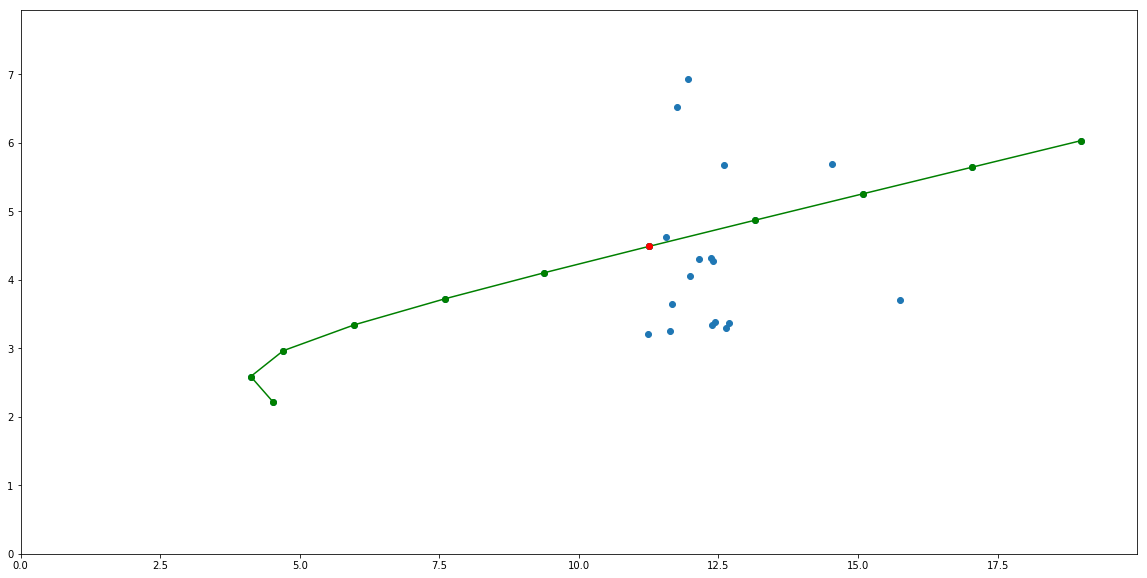

In [25]:
allbases = mix("VT", "VFITX", n=10, mode="NTR")
allbases = list(map(bom, allbases))
allbases = trimBy(allbases, shown)

showRiskReturn(shown + allbases)    
showRiskReturn(allbases, setlim=False, lines=True, color="green")
showRiskReturn([allbases[6]], setlim=False, lines=True, color="red")

### השוואה של כל קרנות ההשתלמות במסלול כללי לתיק 60\40 פשוט - השוואה יחסית בין הקרנות

In [26]:
lst = trimBy(lst, lst)
lst = [s / s[0] for s in lst]
# finals = [(s, s[-1]) for s in lst]
# finals = sorted(finals, key=lambda x: x[1])
# medianSer = finals[len(finals) // 2][0]

medianSer = getMedianSer(lst)
lst2 = [s / medianSer for s in lst]

show(lst2, base, ta=False, legend=False)

## סך נכסים מנוהלים וצבירה נטו לפי סוג קופה

In [58]:
aum = mdf.groupby(["month", "type"])["AUM"].sum()
aum = aum.unstack()
show(aum, ta=False, log=False, title="AUM")

net_flow = mdf.groupby(["month", "type"])["net_flow"].sum()
net_flow = net_flow.unstack()
net_flow = net_flow.cumsum()
total = net_flow.sum(axis=1)
total.name = "Total"
show(net_flow, total, ta=False, log=False, title="Cumulative Net Flow")

## סך נכסים מנוהלים וצבירה נטו בקרנות השתלמות במסלול כללי

In [27]:
aums = list(map(getAum, allKranotIDs))
flowSums = list(map(getFlowSum, allKranotIDs))

In [29]:
aums = [s for s in aums if "כללי" in s.name]
aums = [s for s in aums if not " ** " in s.name] # exclude exclusive funds for specific sectors

flowSums = [s for s in flowSums if "כללי" in s.name]
flowSums = [s for s in flowSums if not " ** " in s.name] # exclude exclusive funds for specific sectors

In [30]:
show(aums, ta=False, legend=False)
show(flowSums, ta=False, legend=False)

## סך נכסים מנוהלים וצבירה נטו ותשואה בקרן ספציפית

In [63]:
id = 1093
flowsum = getFlowSum(id)
aum = getAum(id)
gains = getKeren(id)
show(aum , flowsum, gains, ta=True)

In [64]:
# be sure to save before you publish
# when done, you will get a public link to an HTML file with the results
publish()

<IPython.core.display.Javascript object>

Publishing GemelNetPlay.ipynb ..
published successfuly!
https://nbviewer.jupyter.org/github/ertpload/test/blob/master/76A713A564874CB8A5B4F47F1B93461A.ipynb
